/tmp/ipykernel_55/3929584093.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Salnty"]=x["Salnty"].fillna(x["Salnty"].mean())
/tmp/ipykernel_55/3929584093.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["O2ml_L"]=x["O2ml_L"].fillna(x["O2ml_L"].median())


MSE: 6.226564481026885
RMSE: 2.4953084941599677
R2 Score: 0.6498350281365208


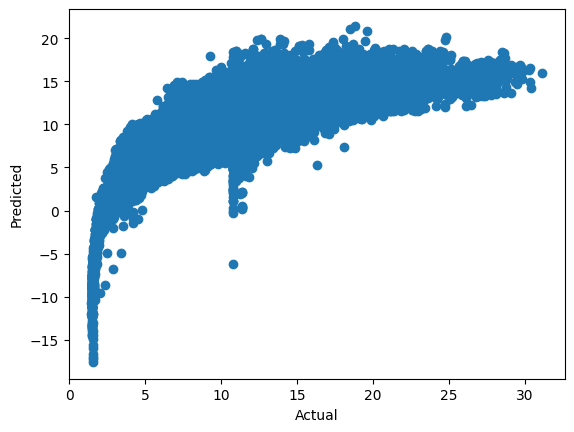

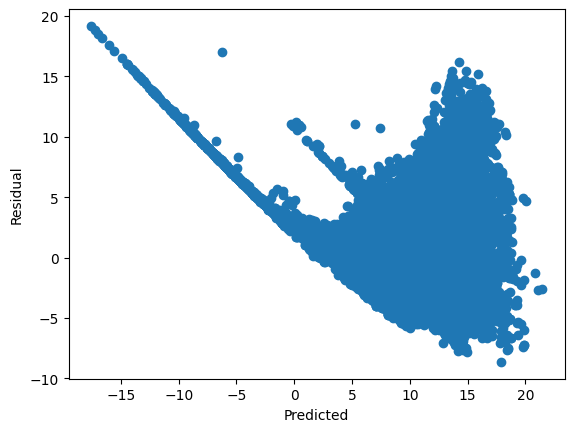

Ridge R2: 0.649835035771503
Lasso R2: 0.6451722250236626


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

d=pd.read_csv("/kaggle/input/calcofi/bottle.csv",low_memory=False)

f=["Depthm","Salnty","O2ml_L"]
x=d[f]
y=d["T_degC"]

x["Salnty"]=x["Salnty"].fillna(x["Salnty"].mean())
x["O2ml_L"]=x["O2ml_L"].fillna(x["O2ml_L"].median())
y=y.fillna(y.mean())

sc=StandardScaler()
x=sc.fit_transform(x)

x1,x2,y1,y2=train_test_split(x,y,test_size=0.2,random_state=1)

m=LinearRegression()
m.fit(x1,y1)

p=m.predict(x2)

mse=mean_squared_error(y2,p)
rmse=np.sqrt(mse)
r2=r2_score(y2,p)

print("MSE:",mse)
print("RMSE:",rmse)
print("R2 Score:",r2)

plt.scatter(y2,p)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

r=y2-p
plt.scatter(p,r)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.show()

r1=Ridge(alpha=1)
r1.fit(x1,y1)
p1=r1.predict(x2)
print("Ridge R2:",r2_score(y2,p1))

l=Lasso(alpha=0.1)
l.fit(x1,y1)
p2=l.predict(x2)
print("Lasso R2:",r2_score(y2,p2))

Accuracy: 0.5942947702060222
Confusion Matrix:
 [[1449    2]
 [1022   51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      1.00      0.74      1451
           1       0.96      0.05      0.09      1073

    accuracy                           0.59      2524
   macro avg       0.77      0.52      0.41      2524
weighted avg       0.75      0.59      0.46      2524



/tmp/ipykernel_55/1034494076.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(),inplace=True)


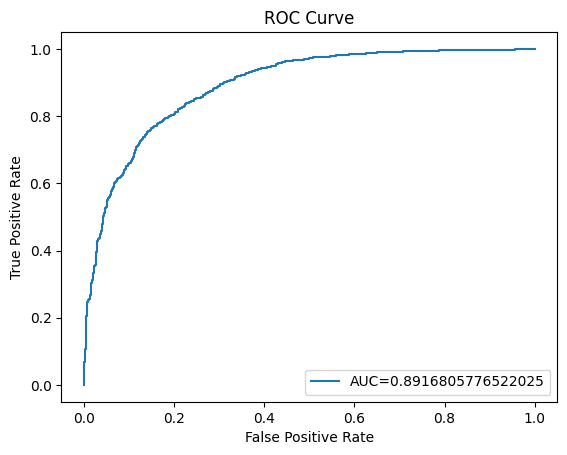

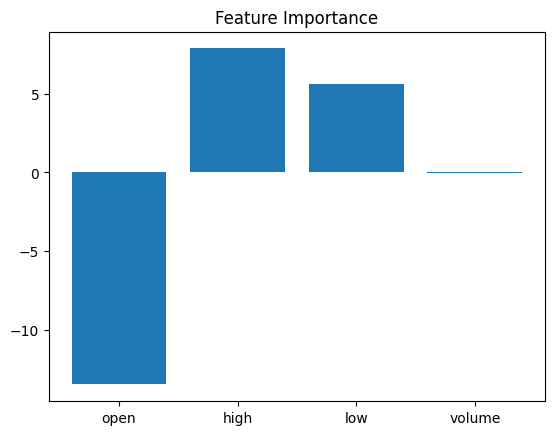

Tuned Accuracy: 0.5752773375594294


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc

df=pd.read_csv("/kaggle/input/lic-stock-price-data/LICI - 10 minute data.csv")

op=hi=lo=cl=vol=None
for c in df.columns:
    t=c.lower()
    if "open" in t:
        op=c
    elif "high" in t:
        hi=c
    elif "low" in t:
        lo=c
    elif "close" in t or "ltp" in t:
        cl=c
    elif "vol" in t:
        vol=c

df["Price_Movement"]=np.where(df[cl]>df[op],1,0)

X=df[[op,hi,lo,vol]]
y=df["Price_Movement"]

X.fillna(X.mean(),inplace=True)

sc=StandardScaler()
X_s=sc.fit_transform(X)

X_tr,X_te,y_tr,y_te=train_test_split(X_s,y,test_size=0.2,random_state=42)

m=LogisticRegression(penalty="l2",C=1.0,solver="liblinear")
m.fit(X_tr,y_tr)

yp=m.predict(X_te)
ypb=m.predict_proba(X_te)[:,1]

print("Accuracy:",accuracy_score(y_te,yp))
print("Confusion Matrix:\n",confusion_matrix(y_te,yp))
print("Classification Report:\n",classification_report(y_te,yp))

fpr,tpr,_=roc_curve(y_te,ypb)
ra=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,label="AUC="+str(ra))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

imp=m.coef_[0]
plt.figure()
plt.bar(X.columns,imp)
plt.title("Feature Importance")
plt.show()

mt=LogisticRegression(C=0.1,penalty="l2",solver="liblinear")
mt.fit(X_tr,y_tr)

print("Tuned Accuracy:",accuracy_score(y_te,mt.predict(X_te)))
